import necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import dataset

In [2]:
url = 'https://courses.cs.washington.edu/courses/cse412/21sp/data/weather.csv.gz'
df = pd.read_csv(url)
df.head()

,station,state,latitude,longitude,elevation,date,TMIN,TMAX,TAVG,AWND,WDF5,WSF5,SNOW,SNWD,PRCP
0,GUAM INTL AP,GU,13.4836,144.7961,77.4,20170312,71.06,87.08,80.06,4.473880,360.0,21.027236,0.0,0.0,0.0
1,ROOSEVELT ROADS,PR,18.2550,-65.6408,10.1,20170404,77.00,86.00,NaN,8.947760,360.0,23.040482,NaN,NaN,0.0
2,ROOSEVELT ROADS,PR,18.2550,-65.6408,10.1,20170420,NaN,NaN,NaN,8.500372,360.0,21.922012,NaN,NaN,0.0
3,SAN JUAN L M MARIN AP,PR,18.4325,-66.0108,2.7,20170120,69.08,82.04,NaN,3.355410,360.0,17.000744,0.0,0.0,0.0
4,SAN JUAN L M MARIN AP,PR,18.4325,-66.0108,2.7,20170217,73.04,87.08,NaN,4.697574,360.0,19.908766,0.0,0.0,0.0


In [3]:
df.shape

(416937, 15)

check if there are any null values

In [4]:
df.isnull().sum()

station           0
state             0
latitude          0
longitude         0
elevation         0
date              0
TMIN           1344
TMAX           1273
TAVG         157899
AWND         182057
WDF5         190822
WSF5         190762
SNOW         281828
SNWD         104495
PRCP           1972
dtype: int64

In [5]:
df.dtypes

station       object
state         object
latitude     float64
longitude    float64
elevation    float64
date           int64
TMIN         float64
TMAX         float64
TAVG         float64
AWND         float64
WDF5         float64
WSF5         float64
SNOW         float64
SNWD         float64
PRCP         float64
dtype: object

the 'date' is not in the right type so we have to fix it later for plotting

In [6]:
df.describe()

,latitude,longitude,elevation,date,TMIN,TMAX,TAVG,AWND,WDF5,WSF5,SNOW,SNWD,PRCP
count,416937.000000,416937.000000,416937.000000,4.169370e+05,415593.000000,415664.000000,259038.000000,234880.000000,226115.000000,226175.000000,135109.000000,312442.000000,414965.000000
mean,41.293931,-104.599374,1148.669856,2.017050e+07,41.790790,62.801081,47.541197,8.142031,202.023612,24.811372,0.049699,15.069284,0.112710
std,7.003117,20.440668,1072.908538,2.494075e+02,18.926374,21.061005,18.598894,6.746946,98.377489,8.964207,0.536061,28.410950,0.328695
min,13.483600,-170.222200,-36.000000,2.017010e+07,-147.820000,-147.820000,-147.820000,0.000000,2.000000,4.026492,0.000000,0.000000,0.000000
25%,37.610000,-116.450000,162.800000,2.017031e+07,29.660000,46.760000,34.340000,4.921268,130.000000,18.119214,0.000000,0.000000,0.000000
50%,41.254400,-109.240000,789.400000,2.017051e+07,42.980000,66.020000,48.740000,6.934514,210.000000,23.040482,0.000000,0.000000,0.000000
75%,44.866400,-90.251100,2130.600000,2.017072e+07,55.040000,79.700000,61.340000,10.066230,290.000000,29.974996,0.000000,22.007886,0.098425
max,71.283300,145.716700,3541.800000,2.017092e+07,98.960000,261.680000,120.560000,112.518082,360.000000,180.073670,67.992163,280.000151,26.031510


As we can see, there are multiple rows missing data about the temperature and wind speed of that day, moreover, there are rows that contain outlier data or even being duplicates. We will have to do data cleaning process before visualization to avoid error.

In [7]:
df['year_month'] = df['date'].astype(str).str[:7]  # Extract "YYYY-MM"

# Convert TAVG to numeric safely
df['TAVG'] = pd.to_numeric(df['TAVG'], errors='coerce')

# Drop NaNs
df = df.dropna(subset=['TAVG'])

# Group by 'YYYY-MM' and compute mean
df_monthly = df.groupby('year_month', as_index=False)['TAVG'].mean()

df_monthly.head()


,year_month,TAVG
0,2017010,20.933739
1,2017011,27.103536
2,2017012,26.791157
3,2017013,31.740061
4,2017020,31.080595


split the df to smaller df based on the state

In [8]:
unique_states_series = pd.Series(df['state'].unique(), name="Unique States")
unique_states_series

0     GU
1     MT
2     CO
3     NV
4     NC
      ..
56    QC
57    NB
58    NS
59    PE
60    NL
Name: Unique States, Length: 61, dtype: object

In [9]:
if "state" in df.columns:
    for state, group in df.groupby(['state']):
        state = str(state).strip("()''").strip("',")
        file_name = f"data/splitted data/{str(state)}.csv"
        group.to_csv(file_name, index=False)
else:
    print("no states found")

In [10]:
ND = pd.read_csv("data/splitted data/ND.csv")
ND.head()

,station,state,latitude,longitude,elevation,date,TMIN,TMAX,TAVG,AWND,WDF5,WSF5,SNOW,SNWD,PRCP,year_month
0,FARGO HECTOR INTL AP,ND,46.9253,-96.8111,274.3,20170223,22.10,31.10,30.38,14.316416,360.0,31.988242,0.0,0.0,0.0,2017022
1,FARGO HECTOR INTL AP,ND,46.9253,-96.8111,274.3,20170228,18.14,31.10,24.98,15.211192,360.0,27.961750,0.0,0.0,0.0,2017022
2,FARGO HECTOR INTL AP,ND,46.9253,-96.8111,274.3,20170302,8.24,19.22,14.54,8.947760,360.0,21.922012,0.0,0.0,0.0,2017030
3,FARGO HECTOR INTL AP,ND,46.9253,-96.8111,274.3,20170310,-2.74,12.20,3.74,10.961006,360.0,23.935258,0.0,0.0,0.0,2017031
4,FARGO HECTOR INTL AP,ND,46.9253,-96.8111,274.3,20170328,31.10,59.00,42.26,5.144962,360.0,14.092722,0.0,0.0,0.0,2017032


In [11]:
ND.dtypes

station        object
state          object
latitude      float64
longitude     float64
elevation     float64
date            int64
TMIN          float64
TMAX          float64
TAVG          float64
AWND          float64
WDF5          float64
WSF5          float64
SNOW          float64
SNWD          float64
PRCP          float64
year_month      int64
dtype: object

In [12]:
import glob
import os

# Define input and output folder paths
input_folder = "data/splitted data/"
output_folder = "data/monthly data/"

# Ensure the output folder exists
os.makedirs(output_folder, exist_ok=True)

# Get a list of all CSV files in the input folder
file_paths = glob.glob(os.path.join(input_folder, "*.csv"))

# Process each state file
for file_path in file_paths:
    # Extract state name from the file name (e.g., "ND.csv" → "ND")
    state = os.path.basename(file_path).split(".")[0]

    # Read the dataset
    df = pd.read_csv(file_path)

    # Ensure 'date' is in proper datetime format
    df['date'] = pd.to_datetime(df['date'].astype(str), format='%Y%m%d')

    # Extract 'YYYY-MM' properly
    df['year_month'] = df['date'].dt.to_period('M').astype(str)

    # Convert TAVG to numeric safely
    df['TAVG'] = pd.to_numeric(df['TAVG'], errors='coerce')

    # Drop NaNs in TAVG
    df = df.dropna(subset=['TAVG'])

    # Group by 'YYYY-MM' and compute mean
    df_monthly = df.groupby('year_month', as_index=False)['TAVG'].mean()

    # Sort values by year_month
    df_monthly = df_monthly.sort_values(by='year_month')

    # Save the processed file
    output_file = os.path.join(output_folder, f"{state}_monthly.csv")
    df_monthly.to_csv(output_file, index=False)


print("✅ All state files processed successfully!")


✅ All state files processed successfully!


understand the correlation
1. positive correlation
2. negative correlation

<Axes: >

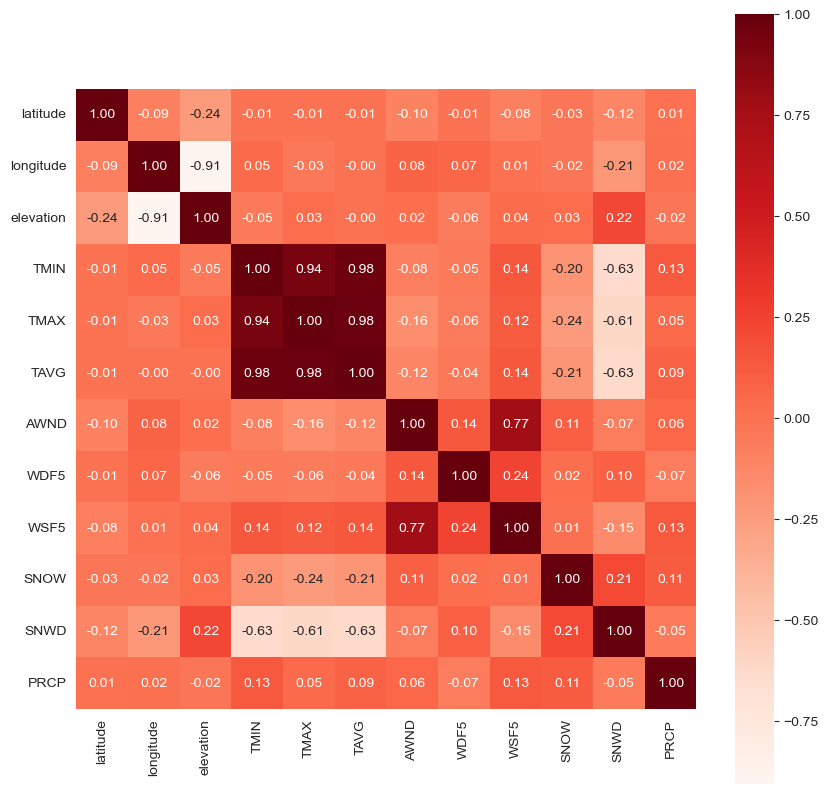

In [13]:
correlation = ND.drop(columns=['station', 'state', 'date', 'year_month']).corr()
plt.figure(figsize = (10,10))
sns.heatmap(correlation, annot=True, annot_kws={"size": 10}, cmap='Reds', square=True, fmt='.2f')

looks like there are some negative correlation between the temperature and snow depth

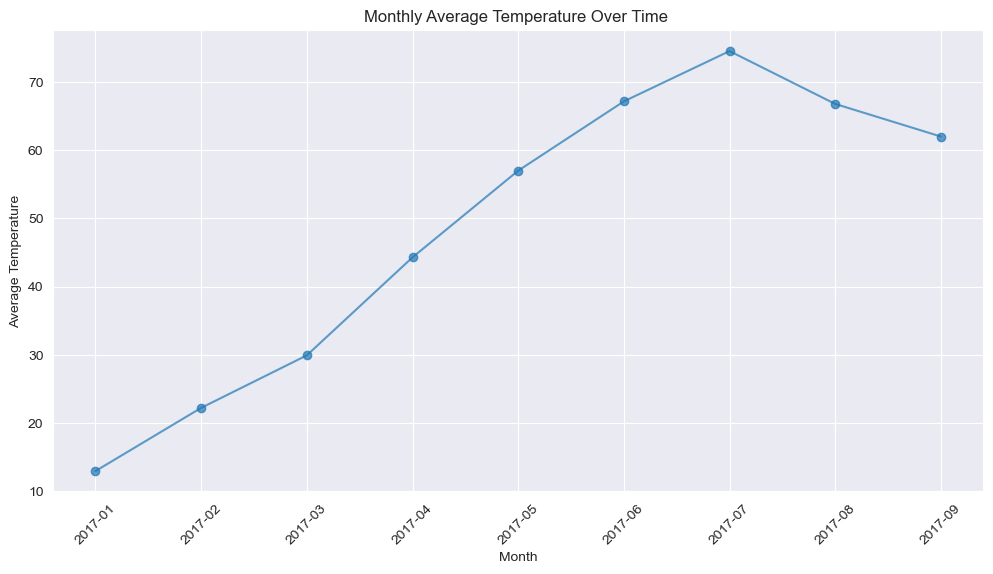

In [14]:
ND_monthly = pd.read_csv("data/monthly data/ND_monthly.csv")

plt.figure(figsize=(12,6))
plt.plot(ND_monthly['year_month'], ND_monthly['TAVG'], marker='o', linestyle='-', alpha=0.7)

plt.xlabel("Month")
plt.ylabel("Average Temperature")
plt.title("Monthly Average Temperature Over Time ")
plt.xticks(rotation=45)
plt.grid(True)

plt.show()

In [15]:
# Define the folder where monthly data is stored
monthly_folder = "data/monthly data/"

# Get all monthly data files
file_paths = glob.glob(os.path.join(monthly_folder, "*.csv"))

# Dictionary to store variance and average values
state_stats = {}

# Process each state file
for file_path in file_paths:
    # Extract state name from filename
    state = os.path.basename(file_path).split("_")[0]

    # Read the monthly data
    df = pd.read_csv(file_path)

    # Ensure 'TAVG' is numeric
    df['TAVG'] = pd.to_numeric(df['TAVG'], errors='coerce')

    # Compute variance and mean of TAVG
    variance = df['TAVG'].var()
    mean_temp = df['TAVG'].mean()

    # Store in dictionary
    state_stats[state] = {"variance": variance, "mean_temp": mean_temp}

# Find the state with the lowest variance
lowest_variance_state = min(state_stats, key=lambda x: state_stats[x]["variance"])
lowest_variance_value = state_stats[lowest_variance_state]["variance"]
lowest_mean_temp = state_stats[lowest_variance_state]["mean_temp"]

# Print the result
print(f"✅ State with the lowest temperature variance: {lowest_variance_state}")
print(f"   - Variance: {lowest_variance_value:.2f}")
print(f"   - Average Temperature: {lowest_mean_temp:.2f}°F")


✅ State with the lowest temperature variance: GU
   - Variance: 1.45
   - Average Temperature: 82.16°F


so GU is the stablest in temperature out of all state in U.S. with the temperature of 82.16°F or 27.8°C

In [16]:
monthly_data_path = "data/monthly data"

# Dictionary to store mean TAVG for each state
state_avg_temps = {}

# Loop through all files in the folder
for file in os.listdir(monthly_data_path):
    if file.endswith(".csv"):  # Ensure it's a CSV file
        state = file.split(".")[0]  # Extract state name from filename
        file_path = os.path.join(monthly_data_path, file)

        # Load data
        df = pd.read_csv(file_path)

        # Check if 'TAVG' exists and is not empty
        if 'TAVG' in df.columns and not df['TAVG'].isna().all():
            state_avg_temps[state] = df['TAVG'].mean()  # Compute mean TAVG

# Convert to DataFrame
state_avg_df = pd.DataFrame(list(state_avg_temps.items()), columns=['State', 'Avg_TAVG'])

# Find the coolest and hottest states
coolest_state = state_avg_df.loc[state_avg_df['Avg_TAVG'].idxmin()]
hottest_state = state_avg_df.loc[state_avg_df['Avg_TAVG'].idxmax()]

print(f"Coolest State\nState: {coolest_state['State'].replace('_monthly', '')}\n"
      f"Avg Temperature: {coolest_state['Avg_TAVG']:.2f}°F\n")

print(f"Hottest State\nState: {hottest_state['State'].replace('_monthly', '')}\n"
      f"Avg Temperature: {hottest_state['Avg_TAVG']:.2f}°F\n")


Coolest State
State: NT
Avg Temperature: 32.21°F

Hottest State
State: GU
Avg Temperature: 82.16°F



despite being the stablest in temperature, GU is the hottest state in US at 82.16°F. in the opposite site, NT is the coolest 

so i would recommend to sell cold food at GU state like: ice cream or fruit bowl, and, it would be a great idea to sell hotpot at NT state

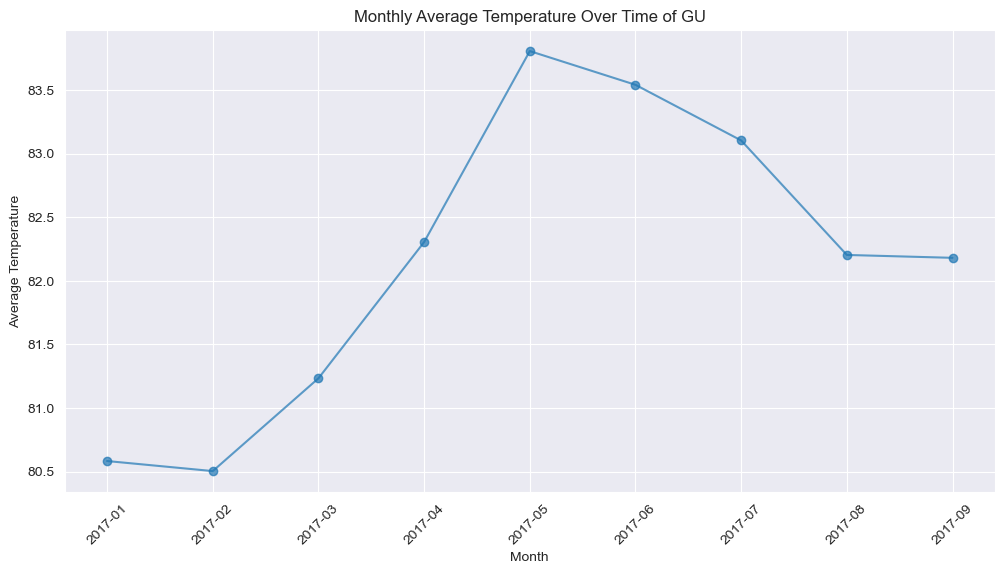

In [17]:
GU_monthly = pd.read_csv("data/monthly data/GU_monthly.csv")

plt.figure(figsize=(12,6))
plt.plot(GU_monthly['year_month'], GU_monthly['TAVG'], marker='o', linestyle='-', alpha=0.7)

plt.xlabel("Month")
plt.ylabel("Average Temperature")
plt.title("Monthly Average Temperature Over Time of GU")
plt.xticks(rotation=45)
plt.grid(True)

plt.show()

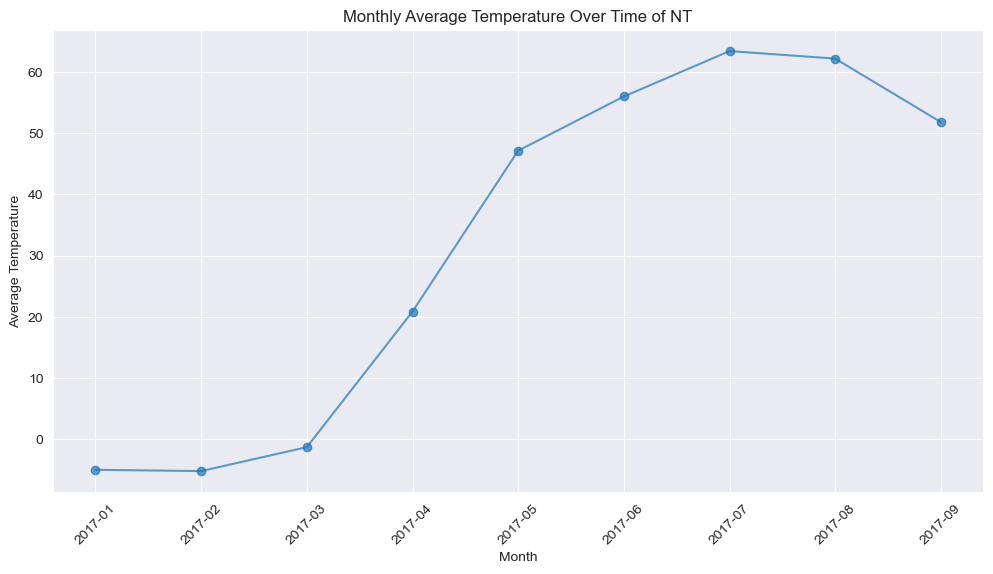

In [18]:
NT_monthly = pd.read_csv("data/monthly data/NT_monthly.csv")

plt.figure(figsize=(12,6))
plt.plot(NT_monthly['year_month'], NT_monthly['TAVG'], marker='o', linestyle='-', alpha=0.7)

plt.xlabel("Month")
plt.ylabel("Average Temperature")
plt.title("Monthly Average Temperature Over Time of NT")
plt.xticks(rotation=45)
plt.grid(True)

plt.show()